In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Kalimantan Tengah.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  383 non-null    datetime64[ns]
 1   Tn       355 non-null    float64       
 2   Tx       347 non-null    float64       
 3   Tavg     346 non-null    float64       
 4   RH_avg   346 non-null    float64       
 5   RR       355 non-null    float64       
 6   ss       355 non-null    float64       
 7   ff_x     358 non-null    float64       
 8   ddd_x    358 non-null    float64       
 9   ff_avg   358 non-null    float64       
 10  ddd_car  358 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 33.0+ KB


C:\Users\rivan\AppData\Local\Temp\ipykernel_10720\1862007407.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,22.8,33.0,0.0,27.7
1,2023-02-01,24.0,33.6,0.0,27.8
2,2023-03-01,24.3,32.3,0.0,24.5
3,2023-04-01,22.6,NaN,24.3,NaN
4,2023-05-01,22.6,31.0,0.7,24.7
...,...,...,...,...,...
378,2023-12-16,NaN,NaN,NaN,NaN
379,2023-12-17,NaN,NaN,NaN,NaN
380,2023-12-18,NaN,34.2,NaN,28.2
381,2023-12-19,23.2,32.4,22.5,27.1


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

58

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,22.8,33.0,0.0,27.7
1,31,31,2023-01-02,23.9,NaN,0.0,NaN
2,59,59,2023-01-03,23.4,29.7,1.2,23.9
3,90,119,2023-01-04,NaN,NaN,NaN,NaN
4,120,149,2023-01-05,24.3,33.6,0.0,27.6
...,...,...,...,...,...,...,...
349,349,378,2023-12-16,NaN,NaN,NaN,NaN
350,350,379,2023-12-17,NaN,NaN,NaN,NaN
351,351,380,2023-12-18,NaN,34.2,NaN,28.2
352,352,381,2023-12-19,23.2,32.4,22.5,27.1


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn         25
Tx         32
RR         25
Tavg       33
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          0
Tx          0
RR          0
Tavg       29
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

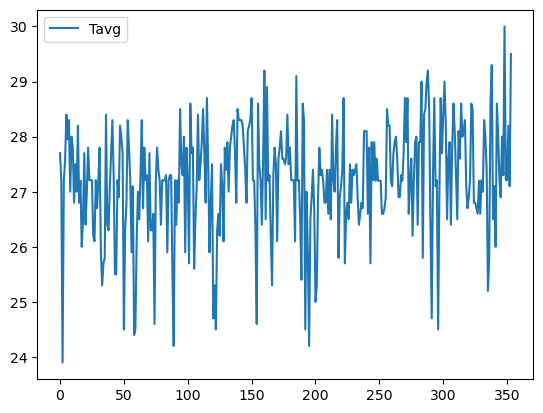

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

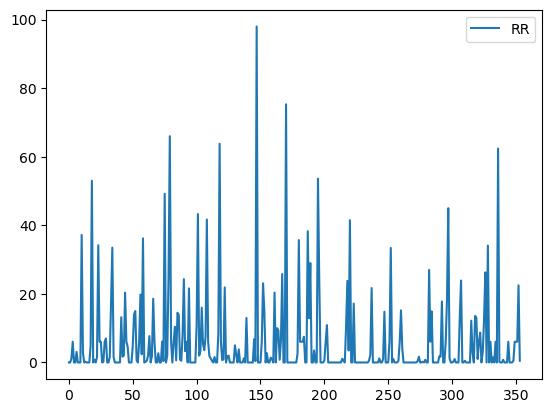

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,22.800000,33.000000,0.000000,27.700000,32.818323,27.209077,0.000000
1,31,31,2023-01-02,23.900000,32.818323,0.000000,27.209077,29.700000,23.900000,1.200000
2,59,59,2023-01-03,23.400000,29.700000,1.200000,23.900000,32.818323,27.209077,6.052888
3,90,119,2023-01-04,23.291793,32.818323,6.052888,27.209077,33.600000,27.600000,0.000000
4,120,149,2023-01-05,24.300000,33.600000,0.000000,27.600000,32.600000,28.400000,0.000000
...,...,...,...,...,...,...,...,...,...,...
349,349,378,2023-12-16,23.291793,32.818323,6.052888,27.209077,32.818323,27.209077,6.052888
350,350,379,2023-12-17,23.291793,32.818323,6.052888,27.209077,34.200000,28.200000,6.052888
351,351,380,2023-12-18,23.291793,34.200000,6.052888,28.200000,32.400000,27.100000,22.500000
352,352,381,2023-12-19,23.200000,32.400000,22.500000,27.100000,33.200000,29.500000,0.500000


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.000000,27.700000,27.209077,0.000000
1,0.000000,27.209077,23.900000,1.200000
2,1.200000,23.900000,27.209077,6.052888
3,6.052888,27.209077,27.600000,0.000000
4,0.000000,27.600000,28.400000,0.000000
...,...,...,...,...
349,6.052888,27.209077,27.209077,6.052888
350,6.052888,27.209077,28.200000,6.052888
351,6.052888,28.200000,27.100000,22.500000
352,22.500000,27.100000,29.500000,0.500000


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.000000,27.700000,27.209077,0.000000
1,0.000000,27.209077,23.900000,1.200000
2,1.200000,23.900000,27.209077,6.052888
3,6.052888,27.209077,27.600000,0.000000
4,0.000000,27.600000,28.400000,0.000000
...,...,...,...,...
348,0.500000,30.000000,27.209077,6.052888
349,6.052888,27.209077,27.209077,6.052888
350,6.052888,27.209077,28.200000,6.052888
351,6.052888,28.200000,27.100000,22.500000


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.000000,27.700000,27.209077,0.000000,0
1,0.000000,27.209077,23.900000,1.200000,1
2,1.200000,23.900000,27.209077,6.052888,2
3,6.052888,27.209077,27.600000,0.000000,3
4,0.000000,27.600000,28.400000,0.000000,4
...,...,...,...,...,...
348,0.500000,30.000000,27.209077,6.052888,348
349,6.052888,27.209077,27.209077,6.052888,349
350,6.052888,27.209077,28.200000,6.052888,350
351,6.052888,28.200000,27.100000,22.500000,351


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
282,282,27.900000
283,283,29.000000
284,284,25.800000
285,285,28.400000
286,286,28.500000
...,...,...
348,348,30.000000
349,349,27.209077
350,350,27.209077
351,351,28.200000


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([27.47731776, 27.71888829, 27.02126607, 27.59046198, 27.6136156 ,
       27.72413598, 27.76913129, 27.61755137, 27.16018776, 26.79019092,
       27.35938683, 27.66648244, 27.31832729, 27.34346346, 26.75306715,
       27.30042137, 27.67304205, 27.45593705, 27.61014082, 27.74250289,
       27.56908128, 27.19908444, 27.44065497, 27.50749197, 27.18117852,
       27.48827412, 27.66431958, 27.55642304, 27.38300143, 27.20957982,
       27.56035881, 27.45246227, 27.67219112, 27.54245289, 27.5656065 ,
       27.61060181, 27.34981343, 27.26375858, 27.30875389, 27.37757344,
       27.68268649, 27.66215672, 27.29215989, 27.29347181, 27.27294204,
       27.25241227, 27.38477434, 27.25503611, 27.38938074, 27.34502672,
       27.63028064, 27.56606749, 27.43632926, 26.95712396, 27.08948603,
       27.70236533, 27.85656909, 27.24631364, 27.37867572, 27.13972903,
       27.70892494, 27.57918671, 27.40774765, 27.34155195, 27.58312248,
       27.43154256, 28.02258016, 27.41430726, 27.41561919, 27.63

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.8716493155653274 1.1579381516509297


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,27.900000
283,283,29.000000
284,284,25.800000
285,285,28.400000
286,286,28.500000
...,...,...
348,348,30.000000
349,349,27.209077
350,350,27.209077
351,351,28.200000


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,27.477318
283,27.718888
284,27.021266
285,27.590462
286,27.613616
...,...
348,28.022580
349,27.414307
350,27.415619


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

C:\Users\rivan\AppData\Local\Temp\ipykernel_10720\2636922572.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,27.700000,NaN
1,27.209077,NaN
2,23.900000,NaN
3,27.209077,NaN
4,27.600000,NaN
...,...,...
348,30.000000,28.022580
349,27.209077,27.414307
350,27.209077,27.415619
351,28.200000,27.633365


<Axes: >

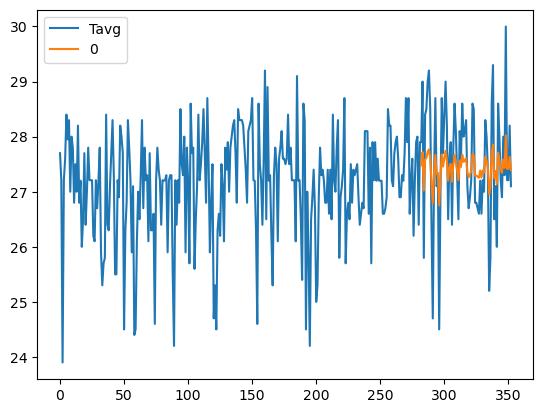

In [27]:
kan.plot()

In [30]:
new_data = [[354, 27.1],[355, 27.1],[356, 27.1],[357, 27.1],[358, 27.1],[359, 27.1],[360, 27.1]]
lr.predict(new_data)

C:\Users\rivan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.39704263, 27.39835455, 27.39966647, 27.4009784 , 27.40229032,
       27.40360224, 27.40491416])

In [31]:
kan.to_json('Prediksi Kalimantan Tengah.json')